# 1. Import Library

In [41]:
import os
import pandas as pd
import difflib
from collections import defaultdict
import csv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [42]:
path_electricity_generation = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\Electricity_Generation_Processed.csv"
path_population = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\population_monthly.csv"
path_sunshine = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\sunshine_monthly.csv"
path_humidity = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\vietnam-humidity-handled-data.csv"
path_rainfall = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\vietnam-rainfall-handled-data.csv"
path_temperature = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\vietnam-temperature-handled-data.csv"

In [43]:
electricity_df = pd.read_csv(path_electricity_generation)
population_df = pd.read_csv(path_population)
sunshine_df = pd.read_csv(path_sunshine)
humidity_df = pd.read_csv(path_humidity)
rainfall_df = pd.read_csv(path_rainfall)
temperature_df = pd.read_csv(path_temperature)

In [44]:
# List các đường dẫn
paths = [
    path_electricity_generation,
    path_population,
    path_sunshine,
    path_humidity,
    path_rainfall,
    path_temperature,
]

In [45]:
YEARS = [year for year in range(2002, 2023)]

In [46]:
MONTHS = [month for month in range(1, 13)]

# 2. Prediction Using ARIMA Model

## 2.1 Check for stationarity using time series plotting

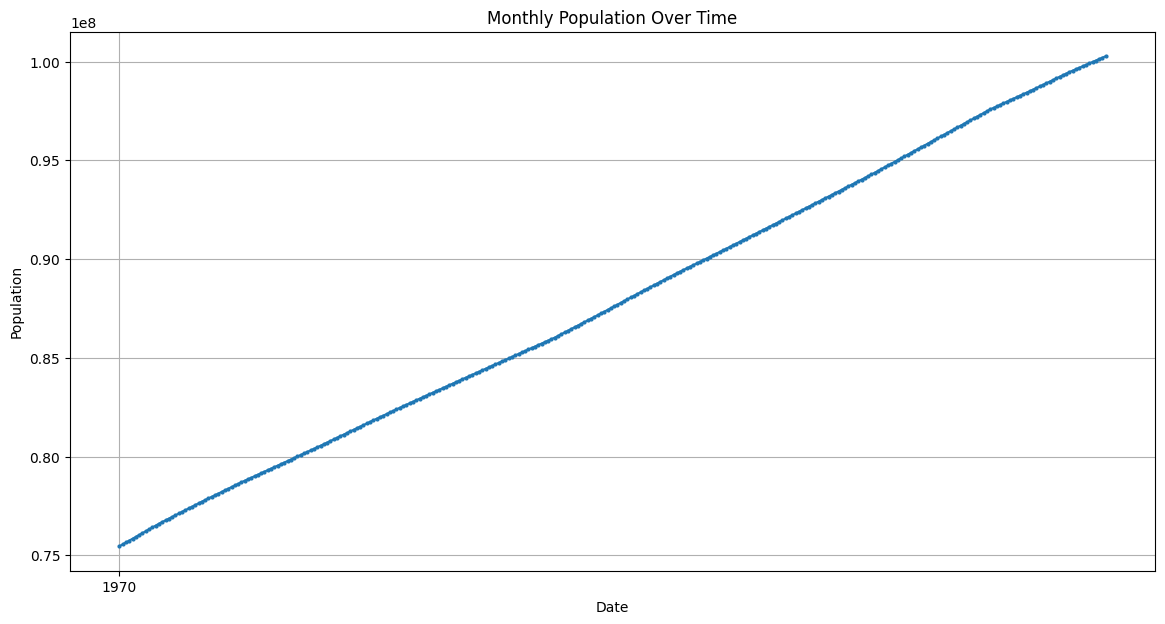

In [47]:
# Vẽ đồ thị
plt.figure(figsize=(14, 7))
plt.plot(population_df.index, population_df['Population'], marker='o', markersize=2)

# Thiết lập nhãn cho trục x và trục y
plt.xlabel('Date')
plt.ylabel('Population')
plt.title('Monthly Population Over Time')

# Định dạng nhãn trục x để hiển thị mỗi năm một lần
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Hiển thị đồ thị
plt.grid(True)
plt.show()

## 2.2 Check for stationarity using time series plotting using ACF Plot and PACF Plot

In [48]:
population_df.head()

,Date,Population
0,1998-01-01,75456300.00
1,1998-02-01,75551333.33
2,1998-03-01,75646366.67
3,1998-04-01,75741400.00
4,1998-05-01,75836433.33


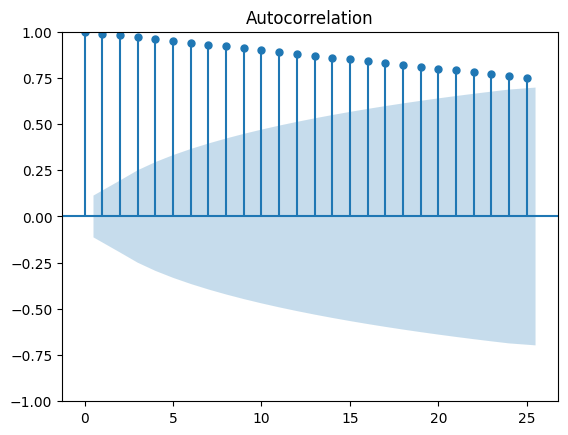

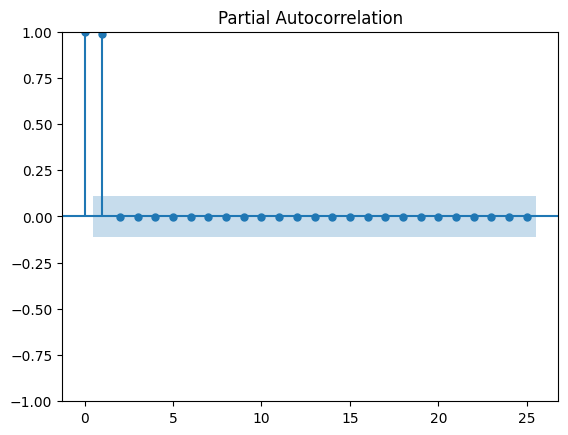

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'population_df' is your DataFrame
# Select the 'Population' column
population_series = population_df['Population']

# Plot ACF and PACF
acf_original = plot_acf(population_series)
pacf_original = plot_pacf(population_series)

## 2.3 Check for stationarity using time series plotting using ADF test

In [50]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(population_df['Population'])
print(f'p-value: {adf_test[1]}')

p-value: 0.9785458145225674


## 2.4 Transform to stationary: differencing

<Axes: >

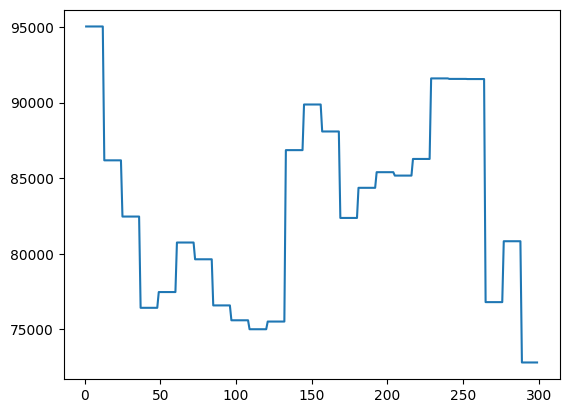

In [51]:
df_train_diff1 = population_df['Population'].diff().dropna()
df_train_diff1.plot()

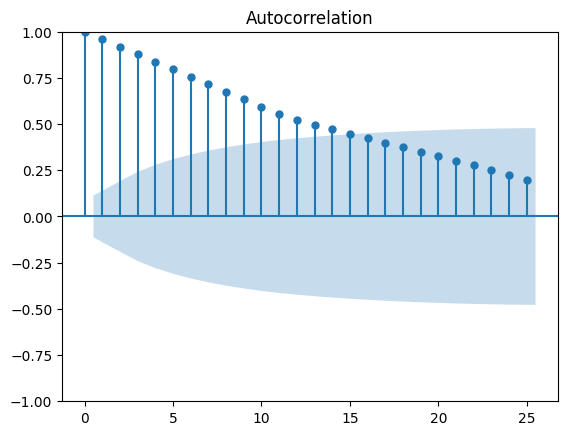

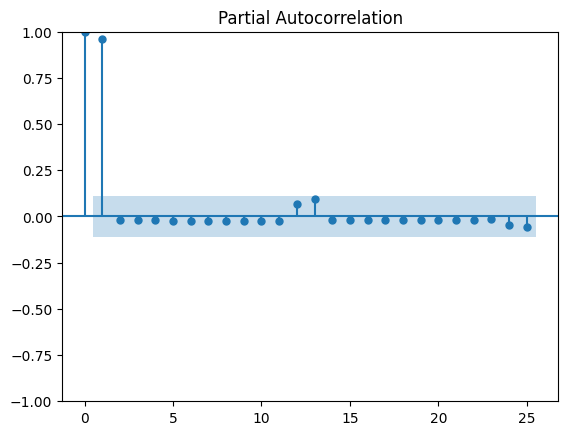

In [52]:
acf_diff = plot_acf(df_train_diff1)

pacf_diff = plot_pacf(df_train_diff1)

In [53]:
adf_test = adfuller(df_train_diff1)
print(f'p-value: {adf_test[1]}')

p-value: 0.19010944674112767


<Axes: >

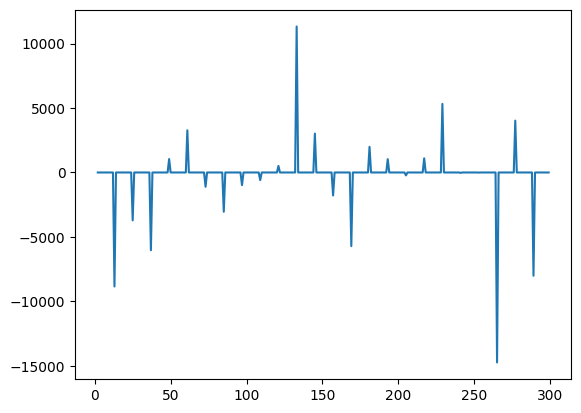

In [54]:
# Calculate the second differenced series
df_train_diff2 = df_train_diff1.diff().dropna()
df_train_diff2.plot()

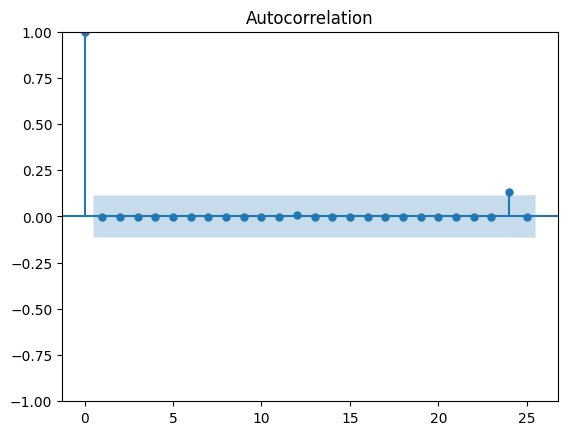

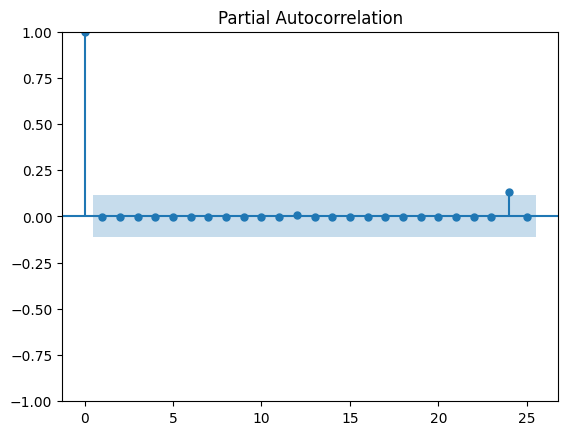

In [55]:
acf_diff = plot_acf(df_train_diff2)

pacf_diff = plot_pacf(df_train_diff2)

In [56]:
adf_test = adfuller(df_train_diff2)
print(f'p-value: {adf_test[1]}')

p-value: 6.297139538237628e-30
